FYI;
1. First 21 columns are taken till bse_positions
2. Replaced the values yes with '0' and 'No' and 'I dont know' with '1'
3. Removed Symptoms_BC and bse_when variable, identified as categorical data. Moreover Bse_practice are not relevant because it is more subjected as personal.
## **Kindly see the notebook and give your feedback and suggestions**

In [3]:
if(!requireNamespace('BiocManager', quietly = TRUE)) {
    install.packages('BiocManager')
    library('BiocManager')
}

if(!requireNamespace('pcaMethods', quietly = TRUE)) {
    BiocManager::install('pcaMethods')
    library('pcaMethods')
}

In [1]:
w_qs_data <- read.csv("18_comp_nb.csv")
w_qs_data <- data.frame(lapply(w_qs_data, function(x) ifelse(x == "Yes", 0, ifelse(x == "No" | x == "Do not know", 1, x))))
w_qs_data

definition,early_diagnosis,risk_breastfeeding,risk_physical_activity,risk_overweight,risk_early_pregnancy,no_riskFactor,symptoms_BC,lumps,mammography,myths_wounds,myths_bra_irritation,bse_knowhow,bse_practice,bse_when,bse_observation,bse_palpation_movement,bse_auxiliary,bse_pressure,bse_positions
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0,0,1,0,0,1,1,"painlessLump, smallMobileLumps, discharge, sizeChange",0,0,1,1,0,0,EveryMonth,0,0,0,0,0
0,0,0,0,0,0,1,"painlessLump, discharge, sizeChange",0,1,1,1,0,0,EveryMonth,0,0,0,1,0
0,0,1,0,0,1,1,"painlessLump, discharge",0,1,1,1,0,0,Once6Mths,0,0,0,1,0
0,0,0,0,0,0,1,"painlessLump, smallMobileLumps, discharge, sizeChange",1,1,1,1,0,0,EveryMonth,0,0,0,1,1
0,0,0,1,0,0,1,"painlessLump, smallMobileLumps, discharge, sizeChange",0,1,1,1,0,1,Never,0,0,0,0,0
0,0,0,0,0,0,1,"painlessLump, PeriodicBi-Pain, discharge, sizeChange",1,1,0,1,0,1,Never,0,0,0,0,0
0,0,1,0,0,1,1,"painlessLump, smallMobileLumps, discharge, sizeChange",0,1,1,1,0,1,Never,0,0,0,0,0
0,0,0,0,0,0,1,"painlessLump, smallMobileLumps, discharge",0,1,1,1,0,0,Once1Yr,1,0,0,1,1
0,0,1,0,0,0,1,"painlessLump, discharge, sizeChange",0,1,1,1,0,1,Never,0,1,1,1,1


In [3]:
# Add all column names from w_qs_data except "bse_when" and "symptoms_BC"
column_names <- names(w_qs_data)[!(names(w_qs_data) %in% c("bse_when", "symptoms_BC", "bse_practice"))]

# Ensure the columns are numeric or convert them
for (col_name in column_names) {
  if (!is.numeric(w_qs_data[[col_name]])) {
    w_qs_data[[col_name]] <- as.numeric(w_qs_data[[col_name]])
  }
}

# Check for missing values
missing_rows <- which(apply(w_qs_data[column_names], 1, function(row) any(is.na(row))))
if (length(missing_rows) > 0) {
  cat("Missing values found in rows:", missing_rows, "\n")
}

# Scale the data
w_qs_data_normalized <- scale(as.matrix(w_qs_data[, column_names], na.rm = TRUE), center = TRUE, scale = TRUE)

Missing values found in rows: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 


In [8]:
normalised_data <- w_qs_data_normalized[1:61, ]

tail(normalised_data)

,definition,early_diagnosis,risk_breastfeeding,risk_physical_activity,risk_overweight,risk_early_pregnancy,no_riskFactor,lumps,mammography,myths_wounds,myths_bra_irritation,bse_knowhow,bse_observation,bse_palpation_movement,bse_auxiliary,bse_pressure,bse_positions
"[56,]",NaN,NaN,-0.9135509,-0.4391629,-0.4651811,-0.8837982,0.412601,0.975642,0.4391629,0.2255575,0.2627261,-0.1280369,-0.1280369,-0.5663402,-0.5663402,1.008163,-0.6926818
"[57,]",NaN,NaN,-0.9135509,-0.4391629,-0.4651811,-0.8837982,-2.383917,-1.008163,0.4391629,-4.3607790,0.2627261,-0.1280369,-0.1280369,-0.5663402,-0.5663402,-0.975642,-0.6926818
"[58,]",NaN,NaN,1.0766850,2.2397307,2.1144595,1.1129311,0.412601,0.975642,0.4391629,0.2255575,-3.7438474,-0.1280369,-0.1280369,-0.5663402,1.7367767,1.008163,1.4199977
"[59,]",NaN,NaN,1.0766850,-0.4391629,-0.4651811,-0.8837982,0.412601,0.975642,0.4391629,0.2255575,0.2627261,-0.1280369,-0.1280369,1.7367767,1.7367767,1.008163,-0.6926818
"[60,]",NaN,NaN,-0.9135509,-0.4391629,-0.4651811,-0.8837982,0.412601,0.975642,0.4391629,0.2255575,0.2627261,-0.1280369,-0.1280369,-0.5663402,-0.5663402,-0.975642,-0.6926818
"[61,]",NaN,NaN,1.0766850,2.2397307,2.1144595,1.1129311,-2.383917,-1.008163,0.4391629,0.2255575,0.2627261,-0.1280369,-0.1280369,-0.5663402,-0.5663402,-0.975642,-0.6926818


Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/ggcorrplot_0.1.4.tar.gz' ...
	OK [downloaded 27.8 Kb in 0.5 secs]
Installing ggcorrplot [0.1.4] ...
	OK [installed binary]
Moving ggcorrplot [0.1.4] into the cache ...
	OK [moved to cache in 0.27 milliseconds]


Loading required package: ggplot2



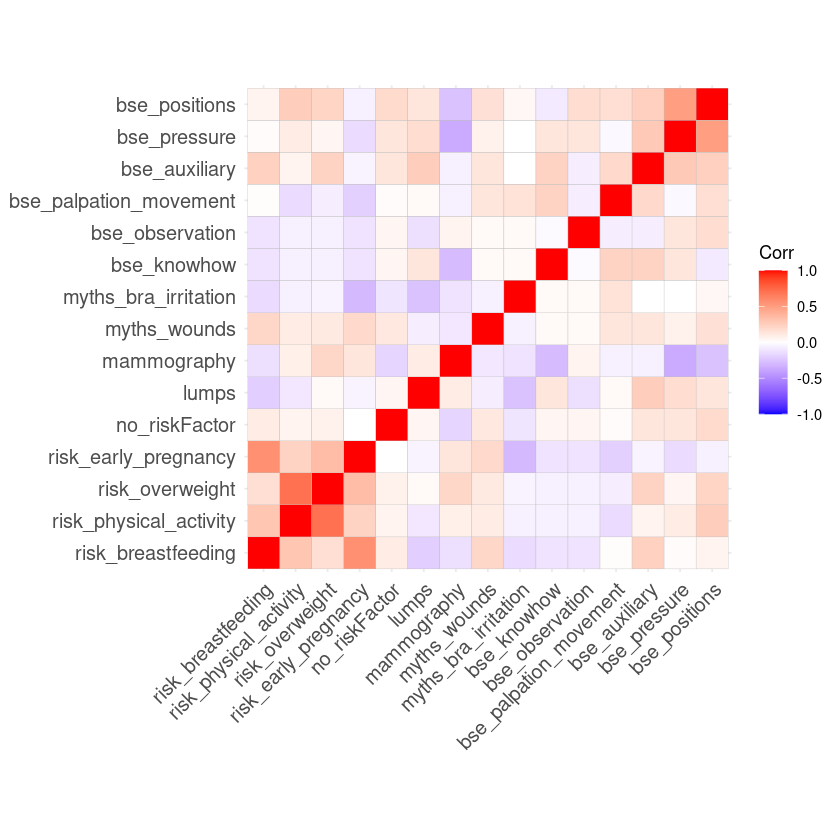

In [10]:
install.packages("ggcorrplot")  # Install the ggcorrplot package
library(ggcorrplot)

corr_matrix <- cor(normalised_data[, !(colnames(normalised_data) %in% c("definition", "early_diagnosis"))]) 
ggcorrplot(corr_matrix)

In [11]:
data.pca <- princomp(corr_matrix)
summary(data.pca)


Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     0.6004577 0.4659501 0.3735408 0.3692871 0.31624963
Proportion of Variance 0.2965898 0.1785953 0.1147804 0.1121811 0.08227188
Cumulative Proportion  0.2965898 0.4751851 0.5899655 0.7021466 0.78441849
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     0.25182127 0.22934512 0.21593376 0.19143515 0.17669992
Proportion of Variance 0.05216464 0.04326836 0.03835593 0.03014635 0.02568408
Cumulative Proportion  0.83658313 0.87985149 0.91820741 0.94835376 0.97403785
                          Comp.11     Comp.12     Comp.13      Comp.14 Comp.15
Standard deviation     0.11994578 0.099301850 0.079733784 0.0309123046       0
Proportion of Variance 0.01183481 0.008111592 0.005229692 0.0007860572       0
Cumulative Proportion  0.98587266 0.993984250 0.999213943 1.0000000000       1

In [12]:
data.pca$loadings[, 1:2]

,Comp.1,Comp.2
risk_breastfeeding,0.35093774,0.26558003
risk_physical_activity,0.36431603,0.24075117
risk_overweight,0.36038007,0.15570628
risk_early_pregnancy,0.48816097,0.06419949
no_riskFactor,-0.04833678,0.25646312
lumps,-0.13669298,0.03382675
mammography,0.25028687,-0.48109515
myths_wounds,0.07793855,0.17753718
myths_bra_irritation,-0.22688158,-0.15450406
bse_knowhow,-0.27522901,0.05820539


Visualisations are given with three different plots for understanding the significance of the selected components 1 and 2.



Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/factoextra_1.0.7.tar.gz' ...
	OK [downloaded 404.7 Kb in 0.5 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/cluster_2.1.4.tar.gz' ...
	OK [downloaded 625.5 Kb in 0.7 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/dendextend_1.17.1.tar.gz' ...
	OK [downloaded 3.7 Mb in 0.7 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/FactoMineR_2.8.tar.gz' ...
	OK [downloaded 3.6 Mb in 0.2 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/ellipse_0.5.0.tar.gz' ...
	OK [downloaded 211.2 Kb in 0.1 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/emmeans_1.8.7.tar.gz' ...
	OK [downloaded 2 Mb in 0.2 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/estimability_1

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



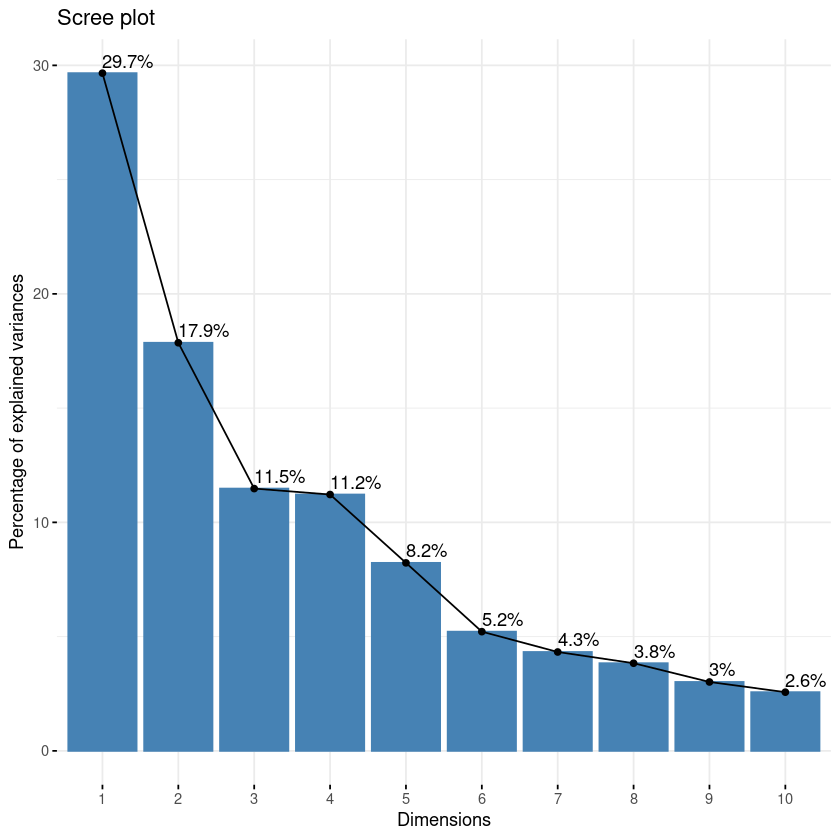

In [13]:
install.packages("factoextra")
library(factoextra)
fviz_eig(data.pca, addlabels = TRUE)

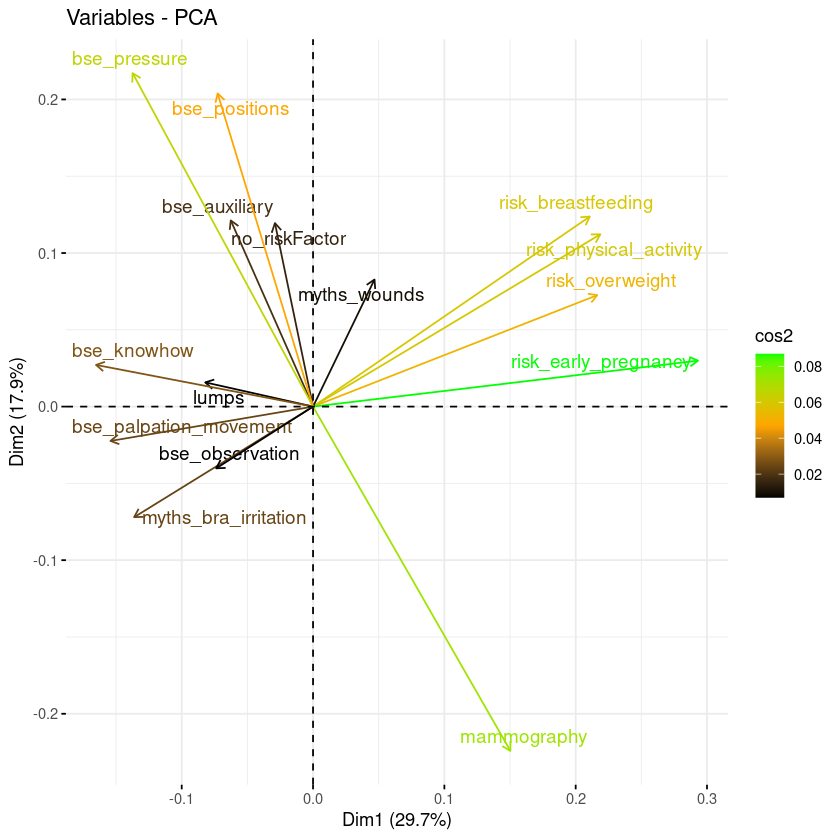

In [39]:
fviz_pca_var(data.pca, col.var = "cos2",
            gradient.cols = c("black", "orange", "green"),
            repel = TRUE)

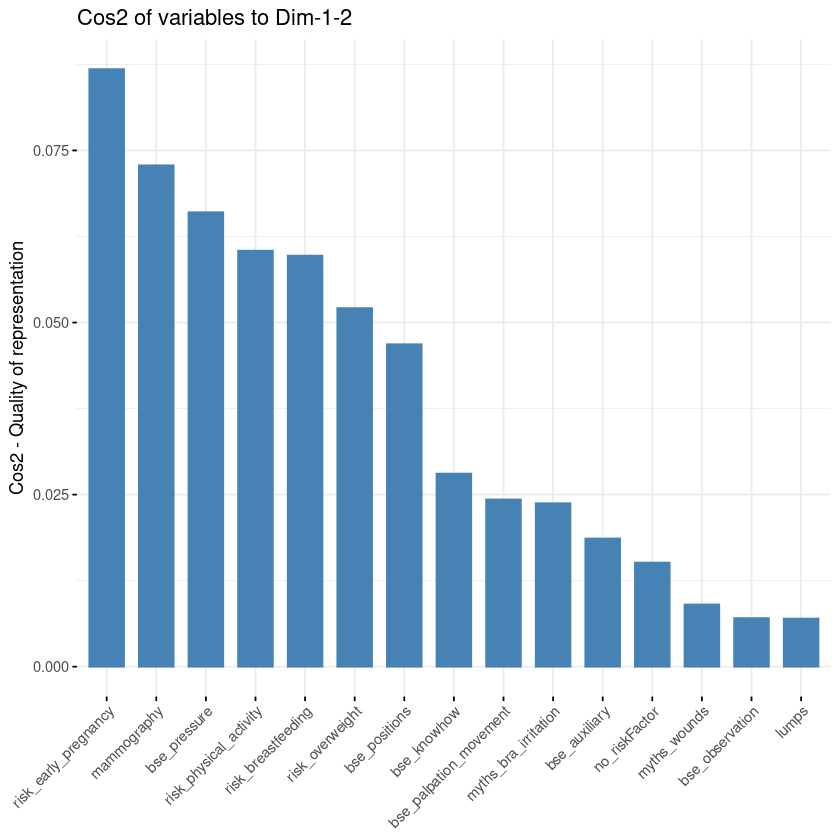

In [26]:
fviz_cos2(data.pca, choice = "var", axes = 1:2)

As an overview, the highest S.D of the first comp. is **0.582** and got **27.53%**.
For the second component **0.482** S.D and total variance of **18.89%**.
Overall variance for the first two components are _**46.42%**_

**Extras**

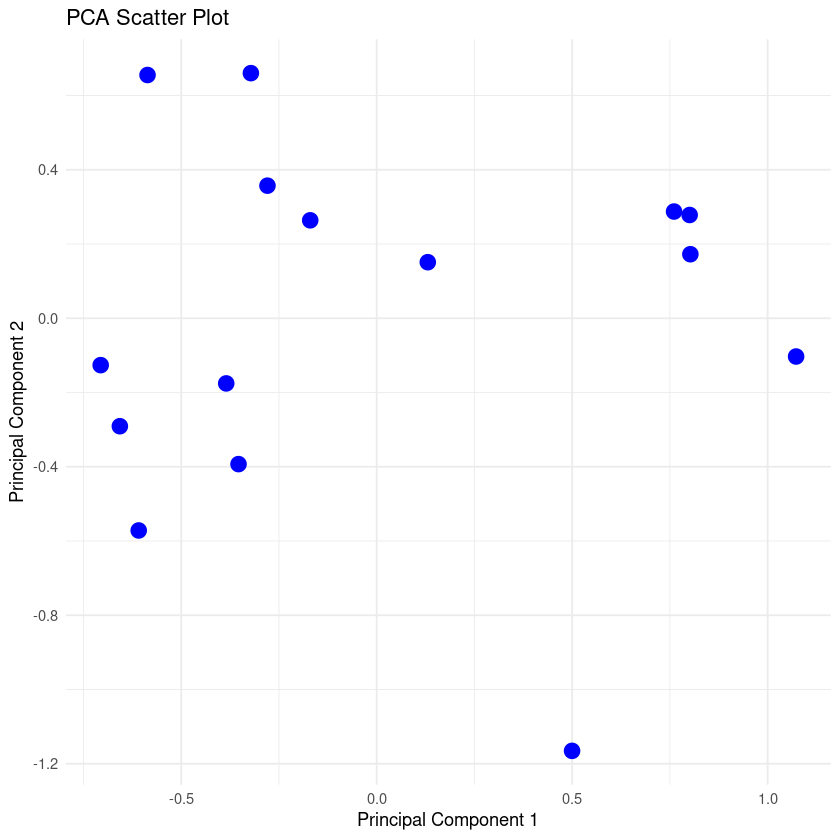

In [38]:

library(ggplot2)
# Extract comp as dataframe
pca_scores <- as.data.frame(data.pca$scores)

# scatter plot
ggplot(data = pca_scores, aes(x = Comp.1, y = Comp.2)) +
  geom_point(size = 4, color = "blue") +
  labs(title = "PCA Scatter Plot",
       x = "Principal Component 1",
       y = "Principal Component 2") +
  theme_minimal()
